In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd="/home/aman/anaconda3/envs/tallyInvoiceParser.env/bin/tesseract"
os.environ['TESSDATA_PREFIX'] = "/home/aman/anaconda3/envs/tallyInvoiceParser.env/share/tessdata"
import import_ipynb
from textPreProcessor import *
from imagePreProcessor import *
from datetime import datetime
import math

2023-06-13 12:05:25.433448: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


importing Jupyter notebook from textPreProcessor.ipynb
Original Date ----> After Processing 

5-12-22
2-2-2023
5-12-2023
5-05-2023
5-05-2023
10-24-2022
10-24-2022
22-05-2023
21-02-23
importing Jupyter notebook from imagePreProcessor.ipynb


In [2]:
pwd

'/home/aman/Documents/Tally/DocumentAI/Code/Tesseract-Modelv4'

In [3]:
imagesDir = '/home/aman/Documents/Tally/DocumentAI/Code/Tesseract-Modelv4/Dataset/SampleImages/'

In [4]:
os.chdir(imagesDir)

In [5]:
imagePath="1.jpeg"

In [6]:
image = cv2.imread(imagePath)

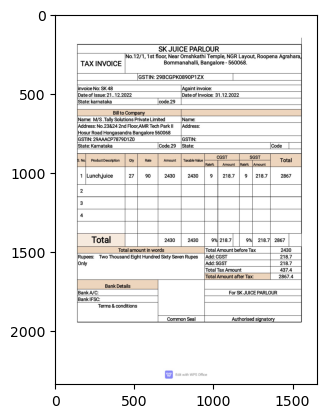

In [7]:
plt.imshow(image)

In [8]:
preProcessedImage = preProcessImage(imagePath)

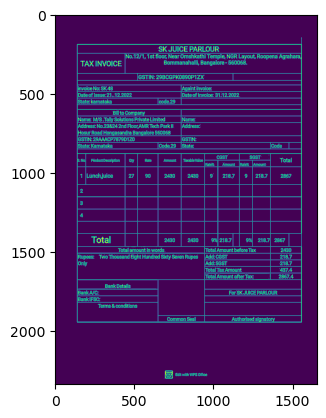

In [9]:
plt.imshow(preProcessedImage)

In [10]:
data = pytesseract.image_to_data(preProcessedImage, output_type=Output.DATAFRAME)

In [11]:
df = pd.DataFrame(data)

In [12]:
df

level  page_num  block_num  par_num  line_num  word_num  left   top  \
0        1         1          0        0         0         0     0     0   
1        2         1          1        0         0         0   648   201   
2        3         1          1        1         0         0   648   201   
3        4         1          1        1         1         0   648   201   
4        5         1          1        1         1         1   648   204   
..     ...       ...        ...      ...       ...       ...   ...   ...   
324      4         1         52        1         1         0   761  2268   
325      5         1         52        1         1         1   761  2268   
326      5         1         52        1         1         2   802  2268   
327      5         1         52        1         1         3   850  2268   
328      5         1         52        1         1         4   904  2268   

     width  height       conf    text  
0     1653    2337  -1.000000     NaN  
1      392      37  -1.000000     NaN  
2      392      37  -1.000000     NaN  
3      392      37  -1.000000     NaN  
4       59      34  90.130569     ‘SK  
..     ...     ...        ...     ...  
324    199      18  -1.000000     NaN  
325     36      18  96.924423    Edit  
326     42      18  96.834167    with  
327     47      18  96.820709     WPS  
328     56      18  96.916046  Office  

[329 rows x 12 columns]

In [13]:
df.dropna(inplace=True)

In [14]:
df

level  page_num  block_num  par_num  line_num  word_num  left   top  \
4        5         1          1        1         1         1   648   204   
5        5         1          1        1         1         2   716   201   
6        5         1          1        1         1         3   850   204   
10       5         1          2        1         1         1   446   254   
11       5         1          2        1         1         2   581   253   
..     ...       ...        ...      ...       ...       ...   ...   ...   
321      5         1         51        1         1         1   135   183   
325      5         1         52        1         1         1   761  2268   
326      5         1         52        1         1         2   802  2268   
327      5         1         52        1         1         3   850  2268   
328      5         1         52        1         1         4   904  2268   

     width  height       conf        text  
4       59      34  90.130569         ‘SK  
5      120      37  96.476700       JUICE  
6      190      34  94.344131    PARLOUR:  
10     125      30  92.094597    No.12/1,  
11     124      31  53.171158  1st.floor,  
..     ...     ...        ...         ...  
321   1426    1772  95.000000              
325     36      18  96.924423        Edit  
326     42      18  96.834167        with  
327     47      18  96.820709         WPS  
328     56      18  96.916046      Office  

[159 rows x 12 columns]

In [15]:
toDrop = []
for col in df.columns:
    if len(df[col].unique())==1:
        toDrop.append(col)
df.drop(columns=toDrop, inplace=True)

indexesToDrop = []
stopwords = ["", " ", "  ", "/", ":", "-", ".", ",", "\n", "\t", "\\", "(", ")", "[", "]", "{", "}", "*", "&", "%", "$", "#", "|"]
for index in df.index:
    if df["conf"][index]<=40:
        indexesToDrop.append(index)
    elif df["text"][index] in stopwords:
        indexesToDrop.append(index)   
df.drop(indexesToDrop, inplace=True)

df

block_num  line_num  word_num  left   top  width  height       conf  \
4            1         1         1   648   204     59      34  90.130569   
5            1         1         2   716   201    120      37  96.476700   
6            1         1         3   850   204    190      34  94.344131   
10           2         1         1   446   254    125      30  92.094597   
11           2         1         2   581   253    124      31  53.171158   
..         ...       ...       ...   ...   ...    ...     ...        ...   
317         50         1         4  1264  1915     97      24  81.338959   
325         52         1         1   761  2268     36      18  96.924423   
326         52         1         2   802  2268     42      18  96.834167   
327         52         1         3   850  2268     47      18  96.820709   
328         52         1         4   904  2268     56      18  96.916046   

           text  
4           ‘SK  
5         JUICE  
6      PARLOUR:  
10     No.12/1,  
11   1st.floor,  
..          ...  
317     signato  
325        Edit  
326        with  
327         WPS  
328      Office  

[111 rows x 9 columns]

In [16]:
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)

In [17]:
df

block_num  line_num  word_num  left   top  width  height       conf  \
0            1         1         1   648   204     59      34  90.130569   
1            1         1         2   716   201    120      37  96.476700   
2            1         1         3   850   204    190      34  94.344131   
3            2         1         1   446   254    125      30  92.094597   
4            2         1         2   581   253    124      31  53.171158   
..         ...       ...       ...   ...   ...    ...     ...        ...   
106         50         1         4  1264  1915     97      24  81.338959   
107         52         1         1   761  2268     36      18  96.924423   
108         52         1         2   802  2268     42      18  96.834167   
109         52         1         3   850  2268     47      18  96.820709   
110         52         1         4   904  2268     56      18  96.916046   

           text  
0           ‘SK  
1         JUICE  
2      PARLOUR:  
3      No.12/1,  
4    1st.floor,  
..          ...  
106     signato  
107        Edit  
108        with  
109         WPS  
110      Office  

[111 rows x 9 columns]

In [18]:
df["x"] = df["left"] + df["width"] 
df["y"] = df["top"] + df["height"]

In [19]:
df["PageHeight"] = preProcessedImage.shape[0]
df["PageWidth"] = preProcessedImage.shape[1]

In [20]:
df

block_num  line_num  word_num  left   top  width  height       conf  \
0            1         1         1   648   204     59      34  90.130569   
1            1         1         2   716   201    120      37  96.476700   
2            1         1         3   850   204    190      34  94.344131   
3            2         1         1   446   254    125      30  92.094597   
4            2         1         2   581   253    124      31  53.171158   
..         ...       ...       ...   ...   ...    ...     ...        ...   
106         50         1         4  1264  1915     97      24  81.338959   
107         52         1         1   761  2268     36      18  96.924423   
108         52         1         2   802  2268     42      18  96.834167   
109         52         1         3   850  2268     47      18  96.820709   
110         52         1         4   904  2268     56      18  96.916046   

           text     x     y  PageHeight  PageWidth  
0           ‘SK   707   238        2337       1653  
1         JUICE   836   238        2337       1653  
2      PARLOUR:  1040   238        2337       1653  
3      No.12/1,   571   284        2337       1653  
4    1st.floor,   705   284        2337       1653  
..          ...   ...   ...         ...        ...  
106     signato  1361  1939        2337       1653  
107        Edit   797  2286        2337       1653  
108        with   844  2286        2337       1653  
109         WPS   897  2286        2337       1653  
110      Office   960  2286        2337       1653  

[111 rows x 13 columns]

In [21]:
dateDF = df.copy()

In [22]:
dateDF

block_num  line_num  word_num  left   top  width  height       conf  \
0            1         1         1   648   204     59      34  90.130569   
1            1         1         2   716   201    120      37  96.476700   
2            1         1         3   850   204    190      34  94.344131   
3            2         1         1   446   254    125      30  92.094597   
4            2         1         2   581   253    124      31  53.171158   
..         ...       ...       ...   ...   ...    ...     ...        ...   
106         50         1         4  1264  1915     97      24  81.338959   
107         52         1         1   761  2268     36      18  96.924423   
108         52         1         2   802  2268     42      18  96.834167   
109         52         1         3   850  2268     47      18  96.820709   
110         52         1         4   904  2268     56      18  96.916046   

           text     x     y  PageHeight  PageWidth  
0           ‘SK   707   238        2337       1653  
1         JUICE   836   238        2337       1653  
2      PARLOUR:  1040   238        2337       1653  
3      No.12/1,   571   284        2337       1653  
4    1st.floor,   705   284        2337       1653  
..          ...   ...   ...         ...        ...  
106     signato  1361  1939        2337       1653  
107        Edit   797  2286        2337       1653  
108        with   844  2286        2337       1653  
109         WPS   897  2286        2337       1653  
110      Office   960  2286        2337       1653  

[111 rows x 13 columns]

In [23]:
for index in dateDF.index:
    text = dateDF["text"][index]
    dateDF["text"][index] = preProcessText(text)

/tmp/ipykernel_11482/2254876534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateDF["text"][index] = preProcessText(text)


In [24]:
dateDF

block_num  line_num  word_num  left   top  width  height       conf  \
0            1         1         1   648   204     59      34  90.130569   
1            1         1         2   716   201    120      37  96.476700   
2            1         1         3   850   204    190      34  94.344131   
3            2         1         1   446   254    125      30  92.094597   
4            2         1         2   581   253    124      31  53.171158   
..         ...       ...       ...   ...   ...    ...     ...        ...   
106         50         1         4  1264  1915     97      24  81.338959   
107         52         1         1   761  2268     36      18  96.924423   
108         52         1         2   802  2268     42      18  96.834167   
109         52         1         3   850  2268     47      18  96.820709   
110         52         1         4   904  2268     56      18  96.916046   

          text     x     y  PageHeight  PageWidth  
0          ‘sk   707   238        2337       1653  
1        juice   836   238        2337       1653  
2      parlour  1040   238        2337       1653  
3      no-12-1   571   284        2337       1653  
4    1st-floor   705   284        2337       1653  
..         ...   ...   ...         ...        ...  
106    signato  1361  1939        2337       1653  
107       edit   797  2286        2337       1653  
108       with   844  2286        2337       1653  
109        wps   897  2286        2337       1653  
110     office   960  2286        2337       1653  

[111 rows x 13 columns]

In [25]:
dates = []
for index in dateDF.index:
    text = dateDF["text"][index]
    if verifyDate(text):
        dates.append(text)

‘sk
juice
parlour
no-12-1
1st-floor
near
omshkathi
temple
ngr
layout
roopena
agrahara
tax
invoice
bommanahalli
bangalore
560068
igstin
invoice
no
sk
48
againt
invoice
date
of
issue
date
of
invoice
31-12-2022
state
karnataka
[code-29
bill
to
company
name
m-s
tally
solutions
private
limited
name
address
no-23&24
2nd
floor-amr
tech
|address
hosur
road
hongasandra
bangalore
560068
gstin
29aaacp7879d1z0
gstin
state
karnataka
code-29
|state
amount
[rate%
|amount
‘taxable
value
2430
“|
2187
9
2187
2430
total
amount
in
words
rupees
two
thousand
eight
hundred
sixty
seven
rupes
|add
cgst
add
sgst
total
tax
amount
total
amount
after
tax
2867-4
for
sk
juice
parlour
terms
conditions
common
seal
authorised
signato
edit
with
wps
office


In [26]:
dates

['31-12-2022']

In [27]:
dateDF[dateDF["text"] == dates[0]]

block_num  line_num  word_num  left  top  width  height       conf  \
30          8         2         8  1008  497    160      28  79.647125   

          text     x    y  PageHeight  PageWidth  
30  31-12-2022  1168  525        2337       1653

In [28]:
df

block_num  line_num  word_num  left   top  width  height       conf  \
0            1         1         1   648   204     59      34  90.130569   
1            1         1         2   716   201    120      37  96.476700   
2            1         1         3   850   204    190      34  94.344131   
3            2         1         1   446   254    125      30  92.094597   
4            2         1         2   581   253    124      31  53.171158   
..         ...       ...       ...   ...   ...    ...     ...        ...   
106         50         1         4  1264  1915     97      24  81.338959   
107         52         1         1   761  2268     36      18  96.924423   
108         52         1         2   802  2268     42      18  96.834167   
109         52         1         3   850  2268     47      18  96.820709   
110         52         1         4   904  2268     56      18  96.916046   

           text     x     y  PageHeight  PageWidth  
0           ‘SK   707   238        2337       1653  
1         JUICE   836   238        2337       1653  
2      PARLOUR:  1040   238        2337       1653  
3      No.12/1,   571   284        2337       1653  
4    1st.floor,   705   284        2337       1653  
..          ...   ...   ...         ...        ...  
106     signato  1361  1939        2337       1653  
107        Edit   797  2286        2337       1653  
108        with   844  2286        2337       1653  
109         WPS   897  2286        2337       1653  
110      Office   960  2286        2337       1653  

[111 rows x 13 columns]

In [29]:
neighbourFields = ["date", "dated", "invoice", "delivery", "order", "due", "payment", "tax", "bill", "receipt", "issue"]

In [30]:
def createColumn(df, list):
    for col in list:
        df[col]=0

In [31]:
createColumn(df, neighbourFields)

In [32]:
df

block_num  line_num  word_num  left   top  width  height       conf  \
0            1         1         1   648   204     59      34  90.130569   
1            1         1         2   716   201    120      37  96.476700   
2            1         1         3   850   204    190      34  94.344131   
3            2         1         1   446   254    125      30  92.094597   
4            2         1         2   581   253    124      31  53.171158   
..         ...       ...       ...   ...   ...    ...     ...        ...   
106         50         1         4  1264  1915     97      24  81.338959   
107         52         1         1   761  2268     36      18  96.924423   
108         52         1         2   802  2268     42      18  96.834167   
109         52         1         3   850  2268     47      18  96.820709   
110         52         1         4   904  2268     56      18  96.916046   

           text     x  ...  dated  invoice  delivery  order  due  payment  \
0           ‘SK   707  ...      0        0         0      0    0        0   
1         JUICE   836  ...      0        0         0      0    0        0   
2      PARLOUR:  1040  ...      0        0         0      0    0        0   
3      No.12/1,   571  ...      0        0         0      0    0        0   
4    1st.floor,   705  ...      0        0         0      0    0        0   
..          ...   ...  ...    ...      ...       ...    ...  ...      ...   
106     signato  1361  ...      0        0         0      0    0        0   
107        Edit   797  ...      0        0         0      0    0        0   
108        with   844  ...      0        0         0      0    0        0   
109         WPS   897  ...      0        0         0      0    0        0   
110      Office   960  ...      0        0         0      0    0        0   

     tax  bill  receipt  issue  
0      0     0        0      0  
1      0     0        0      0  
2      0     0        0      0  
3      0     0        0      0  
4      0     0        0      0  
..   ...   ...      ...    ...  
106    0     0        0      0  
107    0     0        0      0  
108    0     0        0      0  
109    0     0        0      0  
110    0     0        0      0  

[111 rows x 24 columns]

In [34]:
def returnDist(x1, y1, x2, y2):
    p = [x1, y1]
    q = [x2, y2]
    return math.dist(p, q)

In [35]:
for index in df.index:
    x1 = df["x"][index]//df["PageWidth"][index]
    y1 = df["y"][index]//df["PageHeight"][index]
    

In [80]:
d = df[df.index==30]

In [81]:
d

block_num  line_num  word_num  left  top  width  height       conf  \
30          8         2         8  1008  497    160      28  79.647125   

           text     x  ...  dated  invoice  delivery  order  due  payment  \
30  31:12.2022.  1168  ...      0        0         0      0    0        0   

    tax  bill  receipt  issue  
30    0     0        0      0  

[1 rows x 24 columns]

In [82]:
x1 = d["x"][30]/d["PageWidth"][30]
y1 = d["y"][30]/d["PageHeight"][30]
block = d["block_num"][30]
x1

0.7065940713853599

In [89]:
neighbours = {}
for index in df.index:
    x2 = df["x"][index]/df["PageWidth"][index]
    y2 = df["y"][index]/df["PageHeight"][index]
    dist = returnDist(x1, y1, x2, y2)
    if dist!=0 and dist<=0.2:
        neighbours[df["text"][index]]=dist

In [90]:
neighbours

{'PARLOUR:': 0.1451817400021595,
 'Omshkathi': 0.16894695798221127,
 'Temple,': 0.11481861538001611,
 'NGR': 0.1053992798302577,
 'Layout,': 0.11753663337654445,
 'Roopena': 0.17685127908726736,
 'Bommanahalli,': 0.17873851358582393,
 'Bangalore': 0.09885375681492856,
 '560068.': 0.09207855707414928,
 'Againt': 0.17784953313725763,
 'invoice:': 0.1074624464325274,
 'Date': 0.18511846187440315,
 'of': 0.1645498606550881,
 'Invoice:': 0.10223924994764953,
 'Name:': 0.18385974508579422,
 '|Address::': 0.17167224685082033,
 'Amount': 0.18677814348325925,
 '[Rate%': 0.1886653311312442}

In [91]:
lineNeighbours = []
for index in df.index:
    x2 = df["x"][index]/df["PageWidth"][index]
    y2 = df["y"][index]/df["PageHeight"][index]
    blockN = df["block_num"][index]
    if abs(y1-y2)<0.2 and abs(blockN-block)<=1:
        lineNeighbours.append(df["text"][index])

In [92]:
lineNeighbours

['invoice',
 'No:',
 'SK',
 '48',
 'Againt',
 'invoice:',
 'Date',
 'of',
 'Issue:',
 'Date',
 'of',
 'Invoice:',
 '31:12.2022.',
 'State:',
 'karnataka',
 '[code.29']

In [78]:
def allocateNeighbours(df, neighbourFields):
    for index in df.index:
        x1 = df["x"][index]
        y1 = df["y"][index]
        block = df["block_num"][index]
        para = df["par_num"][index]
        neighbours = []
        for index2 in df.index:
            x2 = df["x"][index2]
            y2 = df["y"][index2]
            block2 = df["block_num"][index2]
            para2 = df["par_num"][index2]
            dist = returnDist(x1, y1, x2, y2)
            if dist<100:
                neighbours.append(df["text"][index2].lower())
            if abs(y1-y2)<50 and (x2-x1)<10 and abs(block2-block)<=1 and abs(para2==para)<=1:
                neighbours.append(df["text"][index2].lower())
        for n in neighbourFields:
            if n in neighbours:
                df[n][index]=1

In [79]:
allocateNeighbours(df, neighbourFields)

KeyError: 'par_num'

In [ ]:
df.describe()

In [ ]:
dates

In [ ]:
indexes = []
for date in dates:
    i = dateDF[dateDF["text"]==date].index
    for index in i:
        indexes.append(index)
indexes

In [ ]:
resultDF=df.copy()

In [ ]:
indexesToDrop=[]
for index in resultDF.index:
    if index not in indexes:
        indexesToDrop.append(index)
resultDF.drop(indexesToDrop, inplace=True)

In [ ]:
resultDF